In [6]:
from operator import truediv,add,mul,sub
from numpy import random
from math import sqrt
from scipy.optimize import minimize
import numpy as np
from scipy.optimize import minimize, minimize_scalar
import matplotlib.pyplot as plt

max_iterations = 600
epsilon = 0.001
max_n = 7
parted = 40
maxA = 10
maxC = 10
maxF = 500

n = random.randint(2, max_n)
F = random.randint(5, maxF)
a = [random.uniform(1, maxA) for _ in range(n)]
c = [random.uniform(1, maxC) for _ in range(n)]

int_t = lambda f : map(add,  map(truediv, map(lambda l: l**4 ,f), map(lambda i: i**3 ,a)),map(mul,c,f))
t = lambda f: map(add,  map(lambda y : (y**3), map(truediv,f,a)), c)
dtdx = lambda f: map(truediv, map(lambda p : 3*(p**2),f), map(lambda i: i**3,a))
phi = lambda x: map(sub,t(x),map(mul,dtdx(x),x))
ksi = lambda x: map(lambda z : 1/z, dtdx(x))
z = lambda x: sum(int_t(x))
x0 = np.ones(n)*F/n

success = []
failed = []

def initializeVariables():
    global n,F,a,c,int_t,t,dtdx,phi,ksi,z,x0
    n = random.randint(2, max_n)
    F = random.randint(10, maxF)
    a = [random.uniform(1, maxA) for _ in range(n)]
    c = [random.uniform(1, maxC) for _ in range(n)]
    int_t = lambda f : map(add,  map(truediv, map(lambda l: l**4 ,f), map(lambda i: i**3 ,a)),map(mul,c,f))
    t = lambda f: map(add,  map(lambda y : (y**3), map(truediv,f,a)), c)
    dtdx = lambda f: map(truediv, map(lambda p : 3*(p**2),f), map(lambda i: i**3,a))
    phi = lambda x: map(sub,t(x),map(mul,dtdx(x),x))
    ksi = lambda x: map(lambda z : 1/z, dtdx(x))
    z = lambda x: sum(int_t(x))
    x0 = np.ones(n)*F/n
    return (n,F,a,c)
    
def PHI_BIG_HELP(f,m):
    result = np.empty(n)
    for i in range(0,n):
        if i > m:
            result[i] = 0
        else:
            result[i] = perm_func(ksi,f)[i] * ( F + sum ( map(mul,perm_func(phi,f),perm_func(ksi,f))[0:m]) ) / sum ( perm_func(ksi,f)[0:m] )  - perm_func(ksi,f)[i] * perm_func(phi,f)[i]
    return result

def permutated(f):
    return sorted(range(len(phi(f))),key=lambda x: phi(f)[x]) 

def PHI_BIG(f,m):
    forward = PHI_BIG_HELP(f,m)
    positions =  permutated(f)
    return [forward[positions[i]] for i in range(0,n)]

def perm_func(function,f):
    positions =  permutated(f)
    res = [function(f)[positions[i]] for i in range(0,n)]
    return res

def get_m(f):
    m = 0
    positions =  permutated(f) # to do 
    first = second = 0
    while not (first <= F and second > F):
        if (m+1 >= n) :
            return n
        one = map(lambda x : perm_func(phi,f)[m] - x, perm_func(phi,f)) 
        two = map(mul,one,perm_func(ksi,f))
        first = sum (two[0:m])
        one_2 = map(lambda y : perm_func(phi,f)[m+1]- y, perm_func(phi,f)) 
        two_2 = map(mul,one_2, perm_func(ksi,f))
        second = sum (two_2[0:m])
        m = m+1
    print "reached"
    return m-1

def transport_flow():
    i = 1
    f_k = x0
    m_k = np.count_nonzero(f_k)
    older = f_k
    precision = 1000
    f_k = PHI_BIG(f_k, m_k)
    diff = map(sub,f_k,older)
    #print "iteration :0", " diff : " , diff
    #print "next" , f_k
    precision = sqrt( sum ( map (lambda x: x**2, diff) ) )
    
    while (precision > epsilon):
        if i > max_iterations:  return "error"
        older = f_k
        m_k = get_m(f_k)
        f_k = PHI_BIG(f_k, m_k)
        diff = map(sub,f_k,older)
        #print "iteration :", i , " diff : " , diff
        #print "next" , f_k
        precision = measure(diff)
        i+=1
    return f_k

def standart():
    cond = ({'type' : 'eq', 'fun' : lambda x : np.sum(x) - F},
        {'type' : 'ineq', 'fun' : lambda x: x})
    return minimize(fun=z, x0=x0, constraints=cond, tol = epsilon).x
    
def measure(diff):
    #return sqrt( sum ( map (lambda x: x**2, diff) ) )
    return max( map(abs, diff ))

for i in range(0,10000):
    values = initializeVariables()
    result = transport_flow()
    if result == "error": 
        failed.append(values + (result,))
        continue
        
    standart_res = standart()
    if ( max ( map (lambda x,y : abs(x - y),standart_res,result)) > epsilon * 4 ):
        failed.append(values + (result,))
    else :
        success.append(values + (result,))

data_n = []
data_c = []
data_F = []
data_a = []
   


reached


/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:43: RuntimeWarning: divide by zero encountered in double_scalars
/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:81: RuntimeWarning: invalid value encountered in double_scalars
/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:78: RuntimeWarning: invalid value encountered in double_scalars
/root/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:54: RuntimeWarning: invalid value encountered in double_scalars


reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached
reached


KeyboardInterrupt: 

In [10]:
g = (4,5)
g + (4,)
print len(success)
print len(failed)
import cPickle as pickle
obj = {"success": success, "failed": failed}
output = open('data.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()


1158
7031


In [57]:
with open('data.pkl', 'rb') as input:
    values = pickle.load(input)
    success = values["success"]
    nans = filter(lambda x:np.isnan(np.max(x[4]) ), success)
    failed = values["failed"] + nans
    success = filter(lambda x:not np.isnan(np.max(x[4]) ), success)
    

In [58]:
parted = 40

In [59]:
data_n = []
data_c = []
data_F = []
data_a = []


for s in range(2,max_n):
    yes = len( [i for i, v in enumerate(success) if v[0] == s] ) 
    print yes
    no = len( [i for i, v in enumerate(failed) if v[0] == s] )
    rate = 0
    if (no + yes)!= 0: 
        rate = float(yes)/(no+yes)  
    data_n.append((s, rate))

for s in range(0,parted):
    part = maxF / (parted + 1)
    yes = len( [i for i, v in enumerate(success) if v[1] >= part*s and v[1] <= part*(s+1) ] ) 
    no = len( [i for i, v in enumerate(failed) if v[1] >= part*s and v[1] <= part*(s+1)] )
    rate = 0
    if (no + yes)!= 0: 
        rate = float(yes)/(no+yes) 
    data_F.append((s*part, rate))
    
for s in range(0,parted):
    part = (maxA-1) / (parted + 1)
    yes = len( [i for i, v in enumerate(success) if np.mean(v[2]) >= part*s and np.mean(v[2]) <= part*(s+1) ] ) 
    no = len( [i for i, v in enumerate(failed) if np.mean(v[2]) >= part*s and np.mean(v[2]) <= part*(s+1)] )
    rate = 0
    if (no + yes)!= 0: 
        rate = float(yes)/(no+yes) 
    data_a.append((s*part + 1, rate))

for s in range(0,parted):
    part = (maxC-1) / (parted + 1)
    yes = len( [i for i, v in enumerate(success) if np.mean(v[3]) >= part*s and np.mean(v[3]) <= part*(s+1) ] ) 
    no = len( [i for i, v in enumerate(failed) if np.mean(v[3]) >= part*s and np.mean(v[3]) <= part*(s+1)] )
    rate = 0
    if (no + yes)!= 0: 
        rate = float(yes)/(no+yes) 
    data_c.append((s*part + 1, rate)) 

710
94
5
0
0


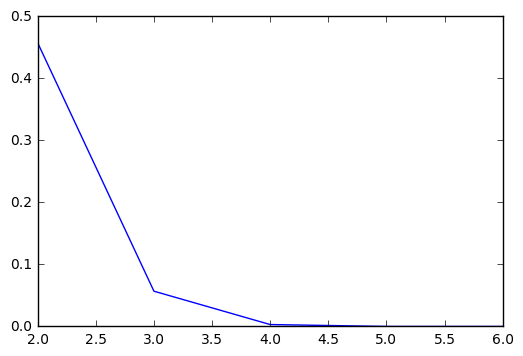

In [60]:
plt.plot(*zip(*data_n))
plt.show()

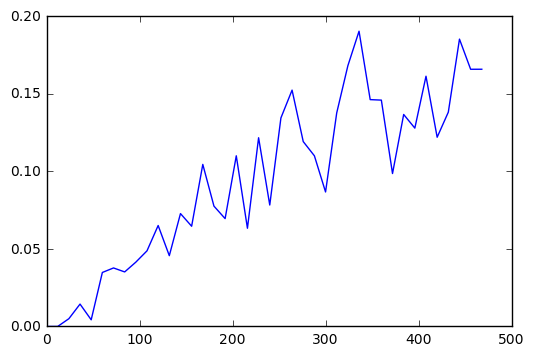

In [61]:
plt.plot(*zip(*data_F))
plt.show()

[(1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)]


In [67]:
print [v[4] for i,v in enumerate(success) if v[0]==4]

[[46.362023065546751, 34.13604853719216, 214.77484383063938, 71.727084566621713], [46.86441299917572, 87.243115130270056, 97.376333974778021, 97.516137895776225], [60.413847762413823, 119.42204470047773, 48.258972335174512, 56.905135201933938], [56.781066325160239, 188.14631809940346, 76.067748789547039, 90.004866785889277], [63.72440733553664, 66.071374275474355, 91.11660238433933, 229.0876160046497]]


In [68]:
print len(success)
print len(failed)

809
7380


In [69]:
print len([v[4] for i,v in enumerate(success) if v[0]==2])

710


In [70]:
print len([v[4] for i,v in enumerate(failed) if v[0]==2])

842
